# Task3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from vector_fields import *
from utils import *
from scipy.integrate import solve_ivp
from scipy.spatial.distance import cdist

## Part 1

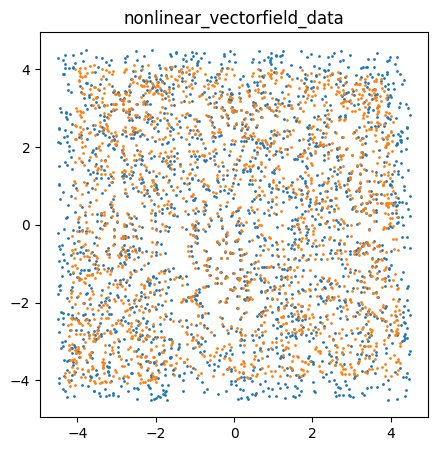

In [2]:
# read the vector field data
x0, x1 = fetch_vector_data(base_filename="nonlinear_vectorfield_data")
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(x0[:,0], x0[:,1], s=1)
ax.scatter(x1[:,0], x1[:,1], s=1)
ax.set_title("nonlinear_vectorfield_data")
plt.show()

A: [[-0.10016012  0.00867272]
 [-0.00253494 -0.43267138]]
Residual error: [3890.04548426 3563.97075073]


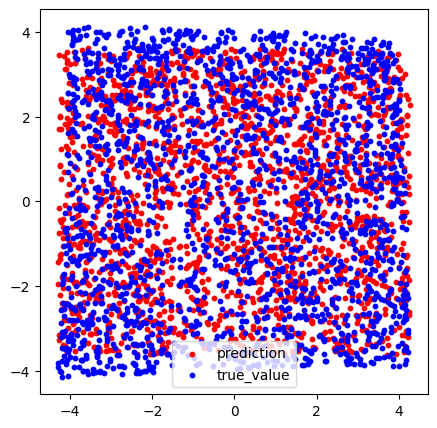

MSE value at 0.5 is: 0.2015206821878147
 Best MSE value is found at time 0.10101010101010102 with MSE: 0.037288166883552555


In [3]:
# utilize delta_t, find delta_t giving lowest possible mse
dt = 0.1
end_time=0.5
plt.rcParams["figure.figsize"] = (5,5)
v = compute_vector_field(dt, x0, x1)
A, res, _, _ = linear_least_squares(data=(x0,v))
print("A:",A)
print("Residual error:",res)
x1_pred, best_dt, best_mse = calculate_trajectory(x0, x1, linear_derivative, args=[A], search_best_delta_t=True, final_time=end_time, generate_plot=False)                       
plt.scatter([el[0] for el in x1_pred], [el[1] for el in x1_pred], c='red', s=10, label='prediction')
plt.scatter(x1[:,0], x1[:,1], c='blue', s=10, label='true_value')
plt.legend()
plt.show()
print(f"MSE value at {end_time} is: {np.linalg.norm(x1_pred-x1)**2 / x1.shape[0]}\n Best MSE value is found at time {best_dt} with MSE: {best_mse}")            

Residual error: [3890.04548426 3563.97075073]


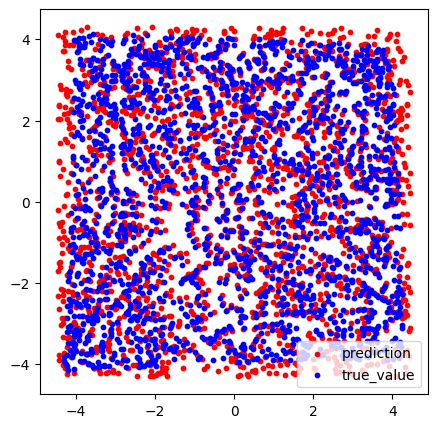

MSE value at 0.10101010101010102 is: 0.03728816688433024


In [4]:
# utilize best delta_t, plot results
dt = 0.1
end_time=best_dt
plt.rcParams["figure.figsize"] = (5,5)
v = compute_vector_field(dt, x0, x1)
A, res, _, _ = linear_least_squares(data=(x0,v))
print("Residual error:",res)
x1_pred, _, _ = calculate_trajectory(x0, x1, linear_derivative, args=[A], search_best_delta_t=False, final_time=end_time, generate_plot=False)
plt.scatter([el[0] for el in x1_pred], [el[1] for el in x1_pred], c='red', s=10, label='prediction')
plt.scatter(x1[:,0], x1[:,1], c='blue', s=10, label='true_value')
plt.legend()
plt.show()
print(f"MSE value at {end_time} is: {np.mean(np.linalg.norm(x1_pred-x1, axis=1)**2)}")

Eigenvalues of A:  [-0.10022625 -0.43260525]


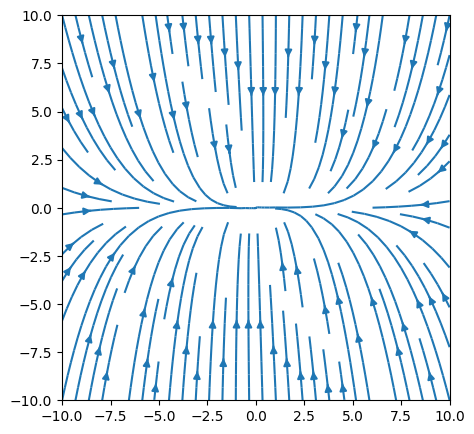

In [5]:
# plot_phase_portrait_matrix(linear_derivative, [A], title_suffix="stable node", display=False)
create_phase_portrait_matrix(A, title_suffix="stable node", display=False)

## Part 2

In [6]:
# find best configuration
final_best_mse, eps, n_bases, final_best_dt, centers = find_optimal_rbf_config(x0,x1)

Optimal configuration: eps = 15, n_bases = 337, dt = 0.011616161616161616, giving MSE = 0.00020764949729391635


Residuals: [13.83011204 10.56435657]


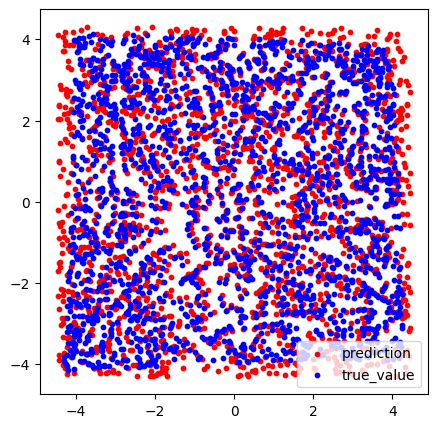

MSE value at 0.011616161616161616 is: 0.03728816688433024


In [7]:
# utilize best delta_t, plot results
dt = 0.1
end_time=final_best_dt
plt.rcParams["figure.figsize"] = (5,5)
v = compute_vector_field(dt, x0, x1)
sol, _, rank, singvals, centers, eps, list_of_bases = nonlinear_least_squares(data=(x0,v), n_bases=n_bases, eps=eps, centers=centers)
predicted_values = list_of_bases @ sol
residuals = (v - predicted_values)**2
residuals_per_dimension = np.sum(residuals, axis=0)  # sum over the sample dimension
print("Residuals:", residuals_per_dimension)

plt.scatter([el[0] for el in x1_pred], [el[1] for el in x1_pred], c='red', s=10, label='prediction')
plt.scatter(x1[:,0], x1[:,1], c='blue', s=10, label='true_value')
plt.legend()
plt.show()
print(f"MSE value at {end_time} is: {np.mean(np.linalg.norm(x1_pred-x1, axis=1)**2)}")

## Part3

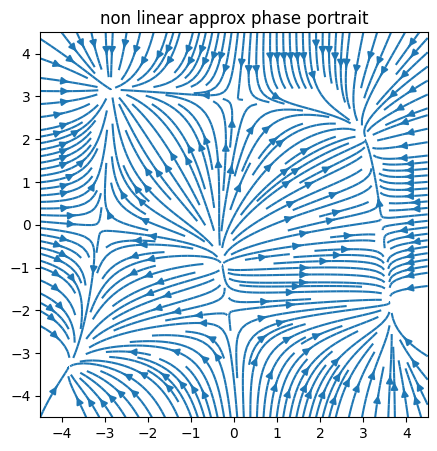

In [8]:
# show phase portrait for best configuration
create_phase_portrait_derivative(rbf_derivative, args=[centers, eps, sol], title_suffix="non linear approx phase portrait", display=False)